### Stanford Dog Breed 데이터 세트를 아래 URL에서 직접 Download 및 압축 해제
* Kaggle의 Dataset으로 Object Storage 연결 시 이미지를 한장 씩 읽는 데 많은 시간이 소요되어 모델 학습에 시간이 더 걸림. 
* Local Disk에 바로 이미지를 다운로드/압축 해제 후 모델에서 이를 이용할 수 있도록 함. 

In [ ]:
# stanford dog breed 데이터 세트 다운로드 
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
# 현재 디렉토리인 /content에 바로 압축 해제 
!ls; tar -xvf images.tar

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Images/n02109047-Great_Dane/n02109047_34148.jpg
Images/n02109047-Great_Dane/n02109047_34162.jpg
Images/n02109047-Great_Dane/n02109047_34209.jpg
Images/n02109047-Great_Dane/n02109047_3643.jpg
Images/n02109047-Great_Dane/n02109047_4267.jpg
Images/n02109047-Great_Dane/n02109047_481.jpg
Images/n02109047-Great_Dane/n02109047_5618.jpg
Images/n02109047-Great_Dane/n02109047_5675.jpg
Images/n02109047-Great_Dane/n02109047_5822.jpg
Images/n02109047-Great_Dane/n02109047_5894.jpg
Images/n02109047-Great_Dane/n02109047_5936.jpg
Images/n02109047-Great_Dane/n02109047_6008.jpg
Images/n02109047-Great_Dane/n02109047_6265.jpg
Images/n02109047-Great_Dane/n02109047_6276.jpg
Images/n02109047-Great_Dane/n02109047_6447.jpg
Images/n02109047-Great_Dane/n02109047_6680.jpg
Images/n02109047-Great_Dane/n02109047_7072.jpg
Images/n02109047-Great_Dane/n02109047_7156.jpg
Images/n02109047-Great_Dane/n02109047_7227.jpg
Images/n02109047-Great_Dane/n02109047_744.jpg
Images/n02109047-Great_

In [ ]:
# 현재 디렉토리의 내용 확인. 
!ls; pwd

Images	images.tar  images.tar.1  images.tar.2	sample_data
/content


In [ ]:
!cd /content/Images;ls

n02085620-Chihuahua			  n02100583-vizsla
n02085782-Japanese_spaniel		  n02100735-English_setter
n02085936-Maltese_dog			  n02100877-Irish_setter
n02086079-Pekinese			  n02101006-Gordon_setter
n02086240-Shih-Tzu			  n02101388-Brittany_spaniel
n02086646-Blenheim_spaniel		  n02101556-clumber
n02086910-papillon			  n02102040-English_springer
n02087046-toy_terrier			  n02102177-Welsh_springer_spaniel
n02087394-Rhodesian_ridgeback		  n02102318-cocker_spaniel
n02088094-Afghan_hound			  n02102480-Sussex_spaniel
n02088238-basset			  n02102973-Irish_water_spaniel
n02088364-beagle			  n02104029-kuvasz
n02088466-bloodhound			  n02104365-schipperke
n02088632-bluetick			  n02105056-groenendael
n02089078-black-and-tan_coonhound	  n02105162-malinois
n02089867-Walker_hound			  n02105251-briard
n02089973-English_foxhound		  n02105412-kelpie
n02090379-redbone			  n02105505-komondor
n02090622-borzoi			  n02105641-Old_English_sheepdog
n02090721-Irish_wolfhound		  n02105855-Shetland_sheepdog
n02091032-Itali

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

for dirname, _, filenames in os.walk('/content/Images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/content/Images/n02107312-miniature_pinscher/n02107312_7128.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_5059.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_6029.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_4167.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_7018.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_5968.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_1520.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_67.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_6580.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_2706.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_3470.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_5752.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_1154.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_811.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_579.jpg
/content

### 이미지 파일들의 디렉토리와 파일명을 기반으로 메타 정보인 이미지 절대경로, 레이블을 DataFrame으로 생성
* /content/Images 디렉토리 밑에 Dog breed 서브 디렉토리와 이미지 파일로 구성 되어 있음. 
* 레이블 값은 이미지 파일의 절대경로에서 이미지 파일 바로 위에 있는 서브 디렉토리를 가공하여 생성. 

In [ ]:
IMAGE_DIR = '/content/Images' 

start_pos = '/content/Images/n02109961-Eskimo_dog/n02109961_12338.jpg'.find('/', len(IMAGE_DIR))
end_pos = '/content/Images/n02109961-Eskimo_dog/n02109961_12338.jpg'.rfind('/')

imsi_breed = '/content/Images/n02109961-Eskimo_dog/n02109961_12338.jpg'[start_pos+1:end_pos]
print(start_pos, end_pos, imsi_breed)
imsi_breed[imsi_breed.find('-')+1:]

15 36 n02109961-Eskimo_dog


'Eskimo_dog'

In [ ]:
IMAGE_DIR = '/content/Images' 

def make_dogbreed_dataframe(image_dir=IMAGE_DIR):
    paths = []
    label_gubuns = []
    for dirname, _, filenames in os.walk(image_dir):
        for filename in filenames:
            # 이미지 파일이 아닌 파일도 해당 디렉토리에 있음.
            if '.jpg' in filename:
                # 파일의 절대 경로를 file_path 변수에 할당. 
                file_path = dirname+'/'+ filename
                paths.append(file_path)
                # 이미지 파일의 절대 경로에서 레이블명 생성을 위한 1차 추출. '/'로 분할하여 파일 바로 위 서브디렉토리 이름 가져옴.  
                start_pos = file_path.find('/', len(IMAGE_DIR))
                end_pos = file_path.rfind('/')
                imsi_breed = file_path[start_pos+1:end_pos]
                # 1차 추출된 데이터를 기반으로 '-' 이후 데이터가 레이블 값임. 
                breed = imsi_breed[imsi_breed.find('-')+1:]
                #print(start_pos, end_pos, imsi_breed)
                label_gubuns.append(breed)

    data_df = pd.DataFrame({'path':paths, 'label':label_gubuns})
    return data_df


In [ ]:
pd.set_option('display.max_colwidth', 200)
data_df = make_dogbreed_dataframe()
print('data_df shape:', data_df.shape)
data_df.head()

data_df shape: (20580, 2)


,path,label
0,/content/Images/n02099429-curly-coated_retriever/n02099429_3119.jpg,curly-coated_retriever
1,/content/Images/n02099429-curly-coated_retriever/n02099429_2186.jpg,curly-coated_retriever
2,/content/Images/n02099429-curly-coated_retriever/n02099429_2838.jpg,curly-coated_retriever
3,/content/Images/n02099429-curly-coated_retriever/n02099429_708.jpg,curly-coated_retriever
4,/content/Images/n02099429-curly-coated_retriever/n02099429_1701.jpg,curly-coated_retriever


### Dog Breed의 개별 분포도 확인. 

In [ ]:
print(data_df.shape)
# breed 별 건수 확인
data_df['label'].value_counts()

(20580, 2)


Maltese_dog           252
Afghan_hound          239
Scottish_deerhound    232
Pomeranian            219
Samoyed               218
                     ... 
groenendael           150
malinois              150
Eskimo_dog            150
Pekinese              149
redbone               148
Name: label, Length: 120, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119]), <a list of 120 Text major ticklabel objects>)

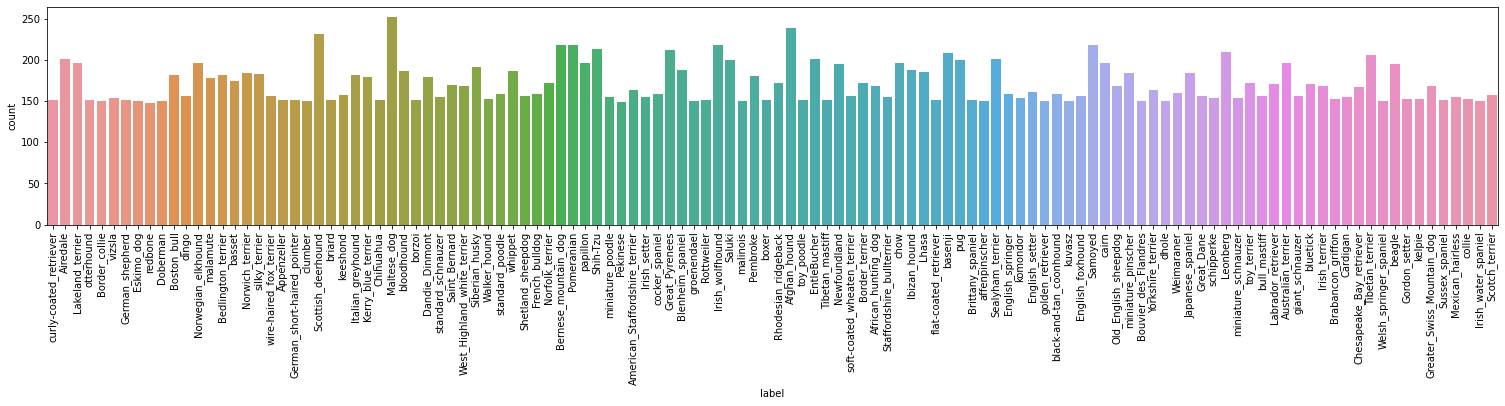

In [ ]:
# 막대 그래프 형태로 breed별 건수 확인 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(26, 4))

sns.countplot(data=data_df, x='label')
plt.xticks(rotation=90)

### Dog Breed의 이미지 보기

In [ ]:
import cv2

# dog breed 별로 image를 보기 위한 utility 함수 생성.
def show_grid_images(image_path_list, ncols=8, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        axs[i].imshow(image)
        axs[i].set_title(title)

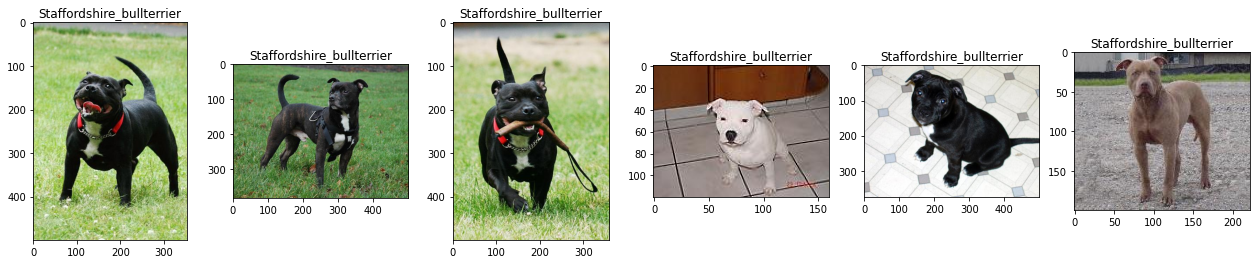

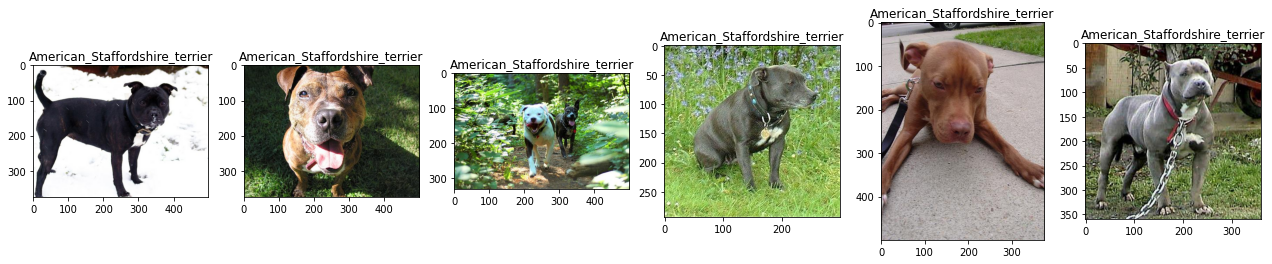

In [ ]:
breed_image_list_01 = data_df[data_df['label']=='Staffordshire_bullterrier']['path'].iloc[:6].tolist()
breed_image_list_02 = data_df[data_df['label']=='American_Staffordshire_terrier']['path'].iloc[:6].tolist()

show_grid_images(breed_image_list_01, ncols=6, title='Staffordshire_bullterrier')
show_grid_images(breed_image_list_02, ncols=6, title='American_Staffordshire_terrier')

In [ ]:
data_df['label'].value_counts().index.tolist()

['Maltese_dog',
 'Afghan_hound',
 'Scottish_deerhound',
 'Pomeranian',
 'Samoyed',
 'Irish_wolfhound',
 'Bernese_mountain_dog',
 'Shih-Tzu',
 'Great_Pyrenees',
 'Leonberg',
 'basenji',
 'Tibetan_terrier',
 'Airedale',
 'Sealyham_terrier',
 'EntleBucher',
 'pug',
 'Saluki',
 'Lakeland_terrier',
 'cairn',
 'Norwegian_elkhound',
 'chow',
 'papillon',
 'Australian_terrier',
 'Newfoundland',
 'beagle',
 'Siberian_husky',
 'Blenheim_spaniel',
 'Ibizan_hound',
 'bloodhound',
 'whippet',
 'Lhasa',
 'Japanese_spaniel',
 'Norwich_terrier',
 'miniature_pinscher',
 'silky_terrier',
 'Boston_bull',
 'Italian_greyhound',
 'Bedlington_terrier',
 'Pembroke',
 'Dandie_Dinmont',
 'Kerry_blue_terrier',
 'malamute',
 'basset',
 'toy_terrier',
 'Border_terrier',
 'Rhodesian_ridgeback',
 'Norfolk_terrier',
 'bluetick',
 'Labrador_retriever',
 'Saint_Bernard',
 'Old_English_sheepdog',
 'West_Highland_white_terrier',
 'African_hunting_dog',
 'Irish_terrier',
 'Greater_Swiss_Mountain_dog',
 'Chesapeake_Bay_ret

In [ ]:
breed_list = data_df['label'].value_counts().index.tolist()

for iter_cnt, breed in enumerate(breed_list):
    breed_image_list = data_df[data_df['label']==breed]['path'].iloc[:6].tolist()
    show_grid_images(breed_image_list, ncols=6, title=breed)
    if iter_cnt == 4:
        break

Output hidden; open in https://colab.research.google.com to view.

### 이미지 사이즈를 224x224로 고정하고 Augmentation 적용한 이미지 살펴 보기

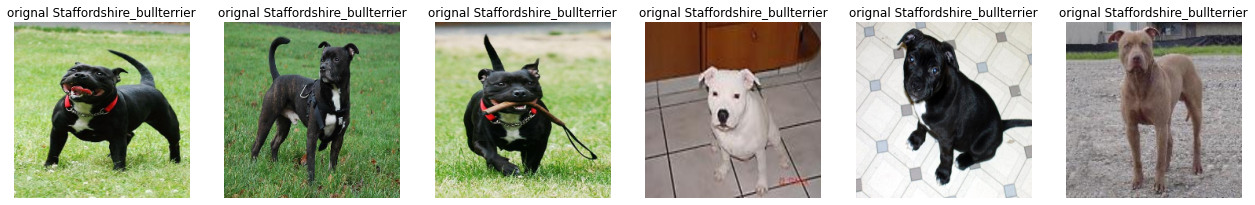

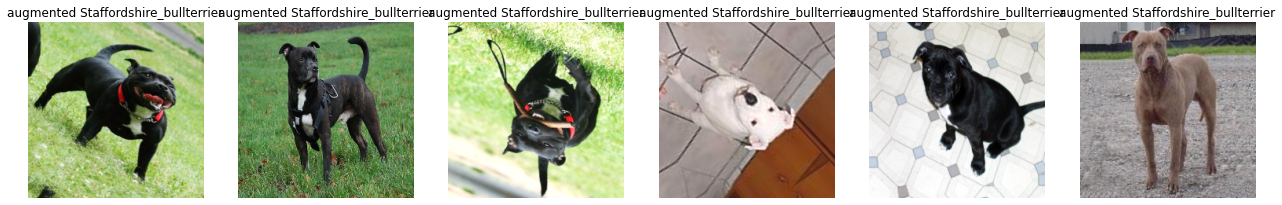

In [ ]:
import albumentations as A

# crop은 사용에 주의할것. 사람과 개가 같이 있으므로 center에 사람이 있을 경우 사람만 이미지가 잘릴수 있음. 
imsi_augmentor = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.5),
    #A.CenterCrop(height=200, width=200, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
    A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5)
])

# augmented 적용된 이미지를 보기 위해서 위에서 albumetation으로 image 변환 기법 적용된 transformer 입력
# 이미지 사이즈를 224x224로 resize 적용. 
def show_grid_images(image_path_list, augmentor=None, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        if augmentor is not None:
            image = augmentor(image=image)['image']
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(title) 
        
breed_image_list_01 = data_df[data_df['label']=='Staffordshire_bullterrier']['path'].iloc[:6].tolist()
show_grid_images(breed_image_list_01, augmentor=None, ncols=6, title='orignal Staffordshire_bullterrier')
show_grid_images(breed_image_list_01, augmentor=imsi_augmentor, ncols=6, title='augmented Staffordshire_bullterrier')

### 전체 DataFrame을 학습과 테스트용 DataFrame으로 분리. 학습 DataFrame은 다시 학습과 검증용으로 분리 
* train_test_split()을 이용하여 전체의 40%를 테스트 데이터로 할당. stratify인자로 breed label별로 균등하게 할당 설정. 

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data_df, test_size=0.4, stratify=data_df['label'], random_state=1422)
print(train_df.shape, test_df.shape)

(12348, 2) (8232, 2)


In [ ]:
print(train_df['label'].value_counts()/train_df.shape[0])
print(test_df['label'].value_counts()/test_df.shape[0])

Maltese_dog               0.012229
Afghan_hound              0.011581
Scottish_deerhound        0.011257
Pomeranian                0.010609
Irish_wolfhound           0.010609
                            ...   
Doberman                  0.007289
Border_collie             0.007289
Welsh_springer_spaniel    0.007289
redbone                   0.007208
Pekinese                  0.007208
Name: label, Length: 120, dtype: float64
Maltese_dog             0.012269
Afghan_hound            0.011662
Scottish_deerhound      0.011297
Pomeranian              0.010690
Bernese_mountain_dog    0.010569
                          ...   
Appenzeller             0.007289
groenendael             0.007289
otterhound              0.007289
Doberman                0.007289
redbone                 0.007167
Name: label, Length: 120, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# DataFrame에서 numpy array로 변환. 
train_path = train_df['path'].values
train_label = pd.get_dummies(train_df['label']).values
# 학습 데이터를 다시 학습과 검증용으로 분할. 
tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, stratify=train_label, test_size=0.2, random_state=0)
print('학습용 path shape:', tr_path.shape, '검증용 path shape:', val_path.shape, 
      '학습용 label shape:', tr_label.shape, '검증용 label shape:', val_label.shape)

학습용 path shape: (9878,) 검증용 path shape: (2470,) 학습용 label shape: (9878, 120) 검증용 label shape: (2470, 120)


### Pytorch Dataset 기반의 Dataset 생성. 
* 추후에 efficientb0에서 efficientb1으로 모델 변경하기 위해 image size를 인자 추가
* Albumentations의 Crop등을 적용하기 위해 augmentation 적용 후 cv2.resize() 로직 변경.
* augmentation은 기본적인 좌우반전(Horizontal) 먼저 적용. 

In [ ]:
from torch.utils.data import Dataset
import sklearn
import cv2

BATCH_SIZE = 64
IMAGE_SIZE = 224

# 입력 인자 image_filenames, labels는 모두 numpy array로 들어옴. 
class Breed_Dataset(Dataset):
    def __init__(self, image_filenames, labels, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                 augmentor=None, shuffle=False, pre_func=None):
        '''
        파라미터 설명
        image_filenames: opencv로 image를 로드할 파일의 절대 경로들
        labels: 해당 image의 label들
        batch_size: __getitem__(self, index) 호출 시 마다 가져올 데이터 batch 건수
        augmentor: albumentations 객체
        shuffle: 학습 데이터의 경우 epoch 종료시마다 데이터를 섞을지 여부
        '''
        # 객체 생성 인자로 들어온 값을 객체 내부 변수로 할당. 
        self.image_filenames = image_filenames
        self.labels = labels
        self.image_size = image_size
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.pre_func = pre_func
        # train data의 경우 
        self.shuffle = shuffle
        if self.shuffle:
            # 객체 생성시에 한번 데이터를 섞음. 
            self.on_epoch_end()
    
    # Dataset을 상속받은 Dataset은 batch_size 단위로 입력된 데이터를 처리함. 
    # __len__()은 전체 데이터 건수가 주어졌을 때 batch_size단위로 몇번 데이터를 반환하는지 나타남
    def __len__(self):
        # batch_size단위로 데이터를 몇번 가져와야하는지 계산하기 위해 전체 데이터 건수를 batch_size로 나누되, 정수로 정확히 나눠지지 않을 경우 1회를 더한다(ceil).
        return int(np.ceil(len(self.labels) / self.batch_size))
    
    # batch_size 단위로 image_array, label_array 데이터를 가져와서 변환한 뒤 다시 반환함
    # 인자로 몇번째 batch 인지를 나타내는 index를 입력하면 해당 순서에 해당하는 batch_size 만큼의 데이타를 가공하여 반환
    # batch_size 갯수만큼 변환된 image_array와 label_array 반환. 
    def __getitem__(self, index):
        # index는 몇번째 batch인지를 나타냄. 
        # batch_size만큼 순차적으로 데이터를 가져오려면 array에서 index*self.batch_size:(index+1)*self.batch_size 만큼의 연속 데이터를 가져오면 됨
        image_name_batch = self.image_filenames[index*self.batch_size:(index+1)*self.batch_size]
        if self.labels is not None:
            label_batch = self.labels[index*self.batch_size:(index+1)*self.batch_size]
        
        # 만일 객체 생성 인자로 albumentation으로 만든 augmentor가 주어진다면 아래와 같이 augmentor를 이용하여 image 변환
        # albumentations은 개별 image만 변환할 수 있으므로 batch_size만큼 할당된 image_name_batch를 한 건씩 iteration하면서 변환 수행. 
        # image_batch 배열은 float32 로 설정. 
        image_batch = np.zeros((image_name_batch.shape[0], self.image_size, self.image_size, 3), dtype='float32')
        
        # batch_size에 담긴 건수만큼 iteration 하면서 opencv image load -> image augmentation 변환(augmentor가 not None일 경우)-> image_batch에 담음. 
        for image_index in range(image_name_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(image_name_batch[image_index]), cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                image = self.augmentor(image=image)['image']
            #crop 시 잘린 이미지가 원본 이미지와 다르게 되므로 augmentation 적용 후 resize() 적용. 
            image = cv2.resize(image, (self.image_size, self.image_size))
            # 만일 preprocessing_input이 pre_func인자로 들어오면 이를 이용하여 scaling 적용. 
            if self.pre_func is not None:
                image = self.pre_func(image)
                
            image_batch[image_index] = image
        
        return image_batch, label_batch
    
    # epoch가 한번 수행이 완료 될 때마다 모델의 fit()에서 호출됨. 
    def on_epoch_end(self):
        if(self.shuffle):
            #print('epoch end')
            # 전체 image 파일의 위치와 label를 쌍을 맞춰서 섞어준다. scikt learn의 utils.shuffle에서 해당 기능 제공
            self.image_filenames, self.labels = sklearn.utils.shuffle(self.image_filenames, self.labels)
        else:
            pass

### 좌우 반전(Horizontal Flip)을 수행하는 Augmentation 생성. 

In [ ]:
import albumentations as A

augmentor_light = A.Compose([
    A.HorizontalFlip(p=0.5),
])

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input
# 학습용, 검증용 Breed_Dataset 생성.
tr_ds = Breed_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                      augmentor=augmentor_light, shuffle=True, pre_func=xcp_preprocess_input)
val_ds = Breed_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                       augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

tr_image_batch = next(iter(tr_ds))[0]
val_image_batch = next(iter(val_ds))[0]
print(tr_image_batch.shape, val_image_batch.shape)

print(tr_image_batch[:1])
print(val_image_batch[:1])

(64, 224, 224, 3) (64, 224, 224, 3)
[[[[-0.08235294 -0.20784312 -0.3333333 ]
   [-0.09803921 -0.2235294  -0.3490196 ]
   [-0.12156862 -0.24705881 -0.38039213]
   ...
   [-0.6        -0.52156866 -0.5921569 ]
   [-0.5921569  -0.5137255  -0.58431375]
   [-0.5921569  -0.5137255  -0.58431375]]

  [[-0.23137254 -0.35686272 -0.4823529 ]
   [-0.20784312 -0.3333333  -0.46666664]
   [-0.16862744 -0.30196077 -0.42745095]
   ...
   [-0.6156863  -0.5372549  -0.60784316]
   [-0.62352943 -0.54509807 -0.6156863 ]
   [-0.62352943 -0.54509807 -0.6156863 ]]

  [[-0.32549018 -0.45098037 -0.5764706 ]
   [-0.26274508 -0.3960784  -0.52156866]
   [-0.1607843  -0.29411763 -0.41960782]
   ...
   [-0.6313726  -0.5529412  -0.62352943]
   [-0.6392157  -0.56078434 -0.6313726 ]
   [-0.654902   -0.5764706  -0.64705884]]

  ...

  [[ 0.0196079   0.0196079   0.0196079 ]
   [ 0.13725495  0.13725495  0.13725495]
   [ 0.14509809  0.14509809  0.14509809]
   ...
   [ 0.7647059   0.41176474  0.2313726 ]
   [ 0.7490196   0.38

### Dataset으로 Storage에 있는 이미지 데이터를 fetch하고 가공하는데 걸리는 시간을 측정. 
* 배치 크기가 64일 경우 0.4초 정도 확보 필요. Local disk가 아닌 Object Storage일 경우 1초가 넘어서 GPU 자원 Utilization이 어려움. 

In [ ]:
import time

tr_ds = Breed_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=augmentor_light, shuffle=True, pre_func=None)
val_ds = Breed_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=None, shuffle=False, pre_func=None)

# Dataset을 64건씩 Fetch하면서 걸리는 시간 측정 
start = time.time()
for value1, value2 in iter(tr_ds):
    end = time.time()
    print(end - start)
    start = end

NameError: ignored

### Pretrained 모델 생성. 
* resnet50, xception, efficientnetb0, efficientnetb1 등으로 pretrained 모델을 생성할 수 있는 함수 생성. 

In [ ]:
from torchvision.models import resnet50, mobilenet
from torch.optim import Adam, RMSprop
from torch.functional import F
import torch.nn as nn
import torch

torch.set_default_tensor_type(torch.FloatTensor)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class ResNet_dog(nn.Module):
  def __init__(self, in_shape=(224,224,3), n_classes=120):
    super().__init__()
    model = resnet50(pretrained=True)
    for params in model.parameters():
      params.requires_grad = False
    self.resnet = model
    self.fc1 = nn.Linear(1000, 640)
    self.fc2 = nn.Linear(640, n_classes)

  def forward(self, x):
    x = self.resnet(x)
    x = F.relu(self.fc1(x))
    x = nn.Dropout2d()(x)
    x = self.fc2(x)
    return x

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

# dog breed 종류는 120가지

def create_model(model_type='resnet50', in_shape=(224, 224, 3), n_classes=120):
    input_tensor = Input(shape=in_shape)
    if model_type == 'resnet50':
        base_model = resnet50(pretrained=True,include_top=False, weights='imagenet', input_tensor=input_tensor)    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    preds = Dense(units=n_classes, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=preds)
    
    return model

### 학습/검증 데이터 분할, Dataset 생성, 모델 생성, 모델 Opt, Loss설정, Learning Rate Callback 설정 함수 생성. 
* Prtrained 모델 유형, 메타 DataFrame, 초기 학습율, Augmentor, scaling 함수를 인자로 입력. 
* Learning Rate Scheduler는 ReduceLROnPlateau 적용. 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from sklearn.model_selection import train_test_split
import sklearn 
import cv2

import albumentations as A

IMAGE_DIR = '/content/Images' 

def make_dogbreed_dataframe(image_dir=IMAGE_DIR):
    paths = []
    label_gubuns = []
    for dirname, _, filenames in os.walk(image_dir):
        for filename in filenames:
            # 이미지 파일이 아닌 파일도 해당 디렉토리에 있음.
            if '.jpg' in filename:
                # 파일의 절대 경로를 file_path 변수에 할당. 
                file_path = dirname+'/'+ filename
                paths.append(file_path)
                # 이미지 파일의 절대 경로에서 레이블명 생성을 위한 1차 추출. '/'로 분할하여 파일 바로 위 서브디렉토리 이름 가져옴.  
                start_pos = file_path.find('/', len(IMAGE_DIR))
                end_pos = file_path.rfind('/')
                imsi_breed = file_path[start_pos+1:end_pos]
                # 1차 추출된 데이터를 기반으로 '-' 이후 데이터가 레이블 값임. 
                breed = imsi_breed[imsi_breed.find('-')+1:]
                #print(start_pos, end_pos, imsi_breed)
                label_gubuns.append(breed)

    data_df = pd.DataFrame({'path':paths, 'label':label_gubuns})
    return data_df

# 학습과 검증 데이터용 numpy array 분리. 
def get_train_valid(train_df, valid_size=0.2, random_state=2021):
    train_path = train_df['path'].values
    train_label = pd.get_dummies(train_df['label']).values
    train_label = np.argmax(train_label, 1)
    tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, test_size=valid_size, random_state=random_state)
    print('tr_path shape:', tr_path.shape, 'tr_label shape:', tr_label.shape, 'val_path shape:', val_path.shape, 'val_label shape:', val_label.shape)
    return tr_path, val_path, tr_label, val_label

from torch.utils.data import Dataset
import sklearn
import cv2

BATCH_SIZE = 64
IMAGE_SIZE = 224

# 입력 인자 image_filenames, labels는 모두 numpy array로 들어옴. 
class Breed_Dataset(Dataset):
    def __init__(self, image_filenames, labels, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                 augmentor=None, shuffle=False, pre_func=None):
        '''
        파라미터 설명
        image_filenames: opencv로 image를 로드할 파일의 절대 경로들
        labels: 해당 image의 label들
        batch_size: __getitem__(self, index) 호출 시 마다 가져올 데이터 batch 건수
        augmentor: albumentations 객체
        shuffle: 학습 데이터의 경우 epoch 종료시마다 데이터를 섞을지 여부
        '''
        # 객체 생성 인자로 들어온 값을 객체 내부 변수로 할당. 
        self.image_filenames = image_filenames
        self.labels = labels
        self.image_size = image_size
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.pre_func = pre_func
        # train data의 경우 
        self.shuffle = shuffle
        if self.shuffle:
            # 객체 생성시에 한번 데이터를 섞음. 
            self.on_epoch_end()
    
    # Dataset을 상속받은 Dataset은 batch_size 단위로 입력된 데이터를 처리함. 
    # __len__()은 전체 데이터 건수가 주어졌을 때 batch_size단위로 몇번 데이터를 반환하는지 나타남
    def __len__(self):
        # batch_size단위로 데이터를 몇번 가져와야하는지 계산하기 위해 전체 데이터 건수를 batch_size로 나누되, 정수로 정확히 나눠지지 않을 경우 1회를 더한다(ceil).
        return int(np.ceil(len(self.labels) / self.batch_size))
    
    # batch_size 단위로 image_array, label_array 데이터를 가져와서 변환한 뒤 다시 반환함
    # 인자로 몇번째 batch 인지를 나타내는 index를 입력하면 해당 순서에 해당하는 batch_size 만큼의 데이타를 가공하여 반환
    # batch_size 갯수만큼 변환된 image_array와 label_array 반환. 
    def __getitem__(self, index):
        # index는 몇번째 batch인지를 나타냄. 
        # batch_size만큼 순차적으로 데이터를 가져오려면 array에서 index*self.batch_size:(index+1)*self.batch_size 만큼의 연속 데이터를 가져오면 됨
        image_name_batch = self.image_filenames[index*self.batch_size:(index+1)*self.batch_size]
        if self.labels is not None:
            label_batch = self.labels[index*self.batch_size:(index+1)*self.batch_size]
        
        # 만일 객체 생성 인자로 albumentation으로 만든 augmentor가 주어진다면 아래와 같이 augmentor를 이용하여 image 변환
        # albumentations은 개별 image만 변환할 수 있으므로 batch_size만큼 할당된 image_name_batch를 한 건씩 iteration하면서 변환 수행. 
        # image_batch 배열은 float32 로 설정. 
        image_batch = np.zeros((image_name_batch.shape[0], 3, self.image_size, self.image_size), dtype='float32')
        
        # batch_size에 담긴 건수만큼 iteration 하면서 opencv image load -> image augmentation 변환(augmentor가 not None일 경우)-> image_batch에 담음. 
        for image_index in range(image_name_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(image_name_batch[image_index]), cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                image = self.augmentor(image=image)['image']
            #crop 시 잘린 이미지가 원본 이미지와 다르게 되므로 augmentation 적용 후 resize() 적용. 
            image = cv2.resize(image, (self.image_size, self.image_size))
            # 만일 preprocessing_input이 pre_func인자로 들어오면 이를 이용하여 scaling 적용. 
            if self.pre_func is not None:
                image = self.pre_func(image)
            image_batch[image_index] = np.transpose(image,(2,0,1))

        # Pytorch
        image_batch = torch.tensor(image_batch)
        label_batch = torch.tensor(label_batch)
        return image_batch, label_batch
    
    # epoch가 한번 수행이 완료 될 때마다 모델의 fit()에서 호출됨. 
    def on_epoch_end(self):
        if(self.shuffle):
            #print('epoch end')
            # 전체 image 파일의 위치와 label를 쌍을 맞춰서 섞어준다. scikt learn의 utils.shuffle에서 해당 기능 제공
            self.image_filenames, self.labels = sklearn.utils.shuffle(self.image_filenames, self.labels)
        else:
            pass
            
augmentor_light = A.Compose([
    A.HorizontalFlip(p=0.5),
])

In [ ]:
N_EPOCHS = 30

def train_model(model_type, train_df, epochs, initial_lr=0.001, augmentor=None, input_pre_func=None):
    tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)
    
    tr_ds = Breed_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                          augmentor=augmentor, shuffle=True, pre_func=input_pre_func)
    val_ds = Breed_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                          augmentor=None, shuffle=False, pre_func=input_pre_func)

    ds = {'train':tr_ds,
          'val'  :val_ds}
    history = {'train_loss':[], 'train_acc':[],
               'val_loss':[],   'val_acc':[]}

    # model_type인자로 들어온 모델 생성. optimizer Adam적용. 
    print('#######', model_type, ' 생성 및 학습 수행 ########')
    model = ResNet_dog().to(device)
    optimizer = Adam(model.parameters(), lr=initial_lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
      tr_size = 0
      val_size = 0
      epoch_tr_loss = 0
      epoch_val_loss = 0
      epoch_tr_acc = 0
      epoch_val_acc = 0

      for mode in ['train', 'val']:
        if mode == 'train':
          model.train()
        else :
          model.eval()
        
        for inputs, labels in ds[mode]:
          inputs = inputs.to(device)
          labels = labels.to(device)
          optimizer.zero_grad()
          with torch.set_grad_enabled(mode=='train'):
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            if mode=='train':
              loss.backward()
              optimizer.step()
            
          _, y = torch.max(outputs,1)
          if mode=='train':
            tr_size += 1
            epoch_tr_loss += loss.item() * len(inputs)
            epoch_tr_acc  += torch.sum(y==labels.data)
          else:
            val_size += 1
            epoch_val_loss += loss.item() * len(inputs)
            epoch_val_acc  += torch.sum(y==labels.data)
      
      print(f"{epoch+1}th epoch... tr_loss : {epoch_tr_loss/tr_size}, val_loss : {epoch_val_loss/val_size}, tr_acc : {epoch_tr_acc/tr_size}, val_acc : {epoch_val_acc/val_size}")

      history['train_loss'].append(epoch_tr_loss / tr_size)
      history['train_acc'].append(epoch_tr_acc / tr_size)
      history['val_loss'].append(epoch_val_loss / val_size)
      history['val_acc'].append(epoch_val_acc / val_size)

    return model, history

IMAGE_DIR = '/content/Images' 

data_df = make_dogbreed_dataframe(image_dir=IMAGE_DIR)
train_df, test_df = train_test_split(data_df, test_size=0.4, stratify=data_df['label'], random_state=2021)
print(train_df.shape, test_df.shape)

(12348, 2) (8232, 2)


### Resnet50 모델로 학습/검증/테스트 성능 평가 수행. 

In [ ]:
resnet_model, resnet_history = train_model(model_type='resnet50', train_df=train_df, epochs=10, initial_lr=0.0001, augmentor=augmentor_light)

tr_path shape: (9878,) tr_label shape: (9878,) val_path shape: (2470,) val_label shape: (2470,)
####### resnet50  생성 및 학습 수행 ########


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


RuntimeError: ignored

### 테스트 Dataset으로 Evaluation 및 Prediction 수행. 

In [ ]:
test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values

# gt_class 컬럼으로 label값을 OHE에서 가장 큰 위치의 인덱스 값으로 Label encoding 
test_df['gt_class'] = np.argmax(test_label, axis=1)

In [ ]:
test_df.head()

In [ ]:
# 테스트 Dataset 생성 후 evaluation으로 성능 평가. 
test_ds = Breed_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

xception_model.evaluate(test_ds)

### 어떤 Breed가 예측이 많이 틀렸는지 확인 
* 실제 Ground Truth Breed와 예측 Breed가 어떻게 틀려졌는지 확인. 

In [ ]:
# 테스트 Dataset으로 개별 image들의 predict 수행. 
predict_result = xception_model.predict(test_ds, steps=int(np.ceil(len(test_label)/BATCH_SIZE)))
predict_class = np.argmax(predict_result, axis=1)
test_df['xcp_pred_class'] = predict_class

In [ ]:
test_df.head()

In [ ]:
# 예측이 틀린 데이터 확인 
test_df[test_df['gt_class'] != test_df['xcp_pred_class']]

In [ ]:
test_df[test_df['gt_class'] != test_df['xcp_pred_class']]['label'].value_counts()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(26, 4))
plt.xticks(rotation=90)

wrong_result_df = test_df[test_df['gt_class'] != test_df['xcp_pred_class']]

sns.countplot(data=wrong_result_df, x='label')

In [ ]:
def show_grid_images(image_path_list, augmentor=None, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        if augmentor is not None:
            image = augmentor(image=image)['image']
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(title) 
        
breed_image_list_01 = data_df[data_df['label']=='Siberian_husky']['path'].iloc[:6].tolist()
breed_image_list_02 = data_df[data_df['label']=='Eskimo_dog']['path'].iloc[:6].tolist()

show_grid_images(breed_image_list_01, ncols=6, title='Siberian_husky')
show_grid_images(breed_image_list_02, ncols=6, title='Eskimo_dog')

### EfficientNetB0 모델로 학습/검증/테스트 성능 평가 수행.

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input

effb0_model_t1, effb0_history_t1 = train_model(model_type='efficientnetb0', train_df=train_df, initial_lr=0.0001, augmentor=augmentor_light,
                             input_pre_func=eff_preprocess_input)

In [ ]:
test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values

test_ds = Breed_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=eff_preprocess_input)

effb0_model_t1.evaluate(test_ds)

In [ ]:
# 테스트 Dataset으로 개별 image들의 predict 수행. 
predict_result = effb0_model_t1.predict(test_ds, steps=int(np.ceil(len(test_label)/BATCH_SIZE)))
predict_class = np.argmax(predict_result, axis=1)
test_df['effb0_t1_pred_class'] = predict_class

In [ ]:
test_df.head()

In [ ]:
test_df[test_df['gt_class'] != test_df['effb0_t1_pred_class']]['label'].value_counts()